***
1. Importar librerías y cargar los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Conexión a la base de datos
conn = sqlite3.connect("../db/optigas.db")

# Cargar el dataset
df = pd.read_sql("SELECT * FROM gold_lecturas_completas", conn)
df['timestamp'] = pd.to_datetime(df['timestamp'])
conn.close()

df.head()


,timestamp,presion,temperatura,volumen,cliente_id
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1


***
2. Información general y tipos de datos

In [2]:
print("✅ Tamaño del dataset:", df.shape)
print("\n📊 Información del dataset:")
print(df.info())

print("\n🔍 Nulos por columna:")
print(df.isnull().sum())


✅ Tamaño del dataset: (847946, 5)

📊 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847946 entries, 0 to 847945
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   timestamp    847946 non-null  datetime64[ns]
 1   presion      847946 non-null  float64       
 2   temperatura  847946 non-null  float64       
 3   volumen      847946 non-null  float64       
 4   cliente_id   847946 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 32.3+ MB
None

🔍 Nulos por columna:
timestamp      0
presion        0
temperatura    0
volumen        0
cliente_id     0
dtype: int64


***
 3. Visualizar número de registros por cliente

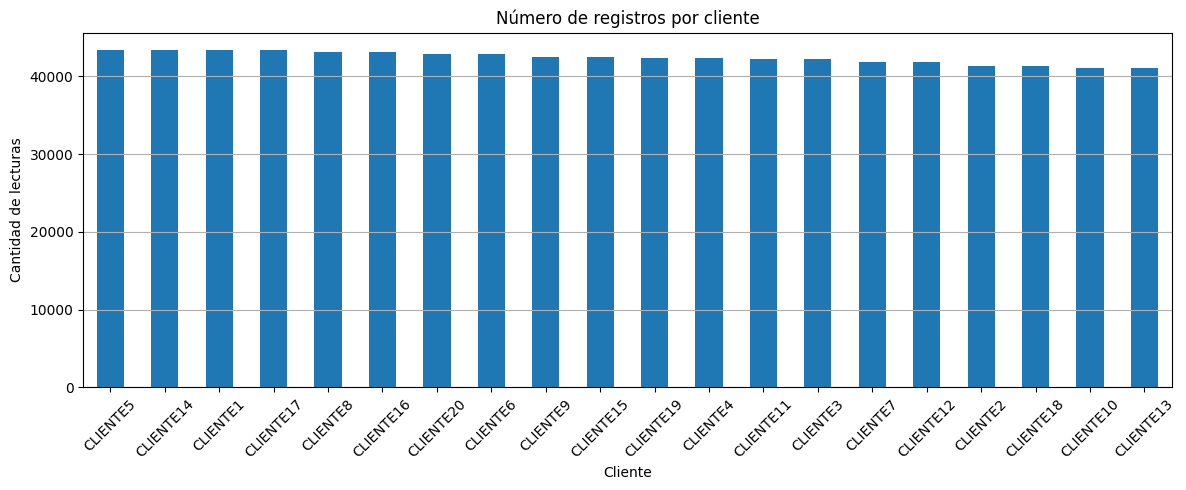

In [3]:
plt.figure(figsize=(12,5))
df['cliente_id'].value_counts().plot(kind='bar')
plt.title("Número de registros por cliente")
plt.xlabel("Cliente")
plt.ylabel("Cantidad de lecturas")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


***
4. Estadísticas descriptivas

In [4]:
print("\nEstadísticas descriptivas generales:")
df.describe()


Estadísticas descriptivas generales:


,timestamp,presion,temperatura,volumen
count,847946,847946.000000,847946.000000,847946.000000
mean,2021-07-08 22:21:24.585574144,16.072967,25.198209,62.327764
min,2019-01-14 00:00:00,2.934873,-5.257899,0.000000
25%,2020-04-13 23:00:00,17.097354,22.692978,0.000000
50%,2021-07-07 07:00:00,17.570446,25.379804,21.772860
75%,2022-10-06 03:00:00,17.694256,27.886246,99.319087
max,2023-12-31 23:00:00,20.307852,50.019853,577.413425
std,NaN,4.186395,3.790516,80.498365


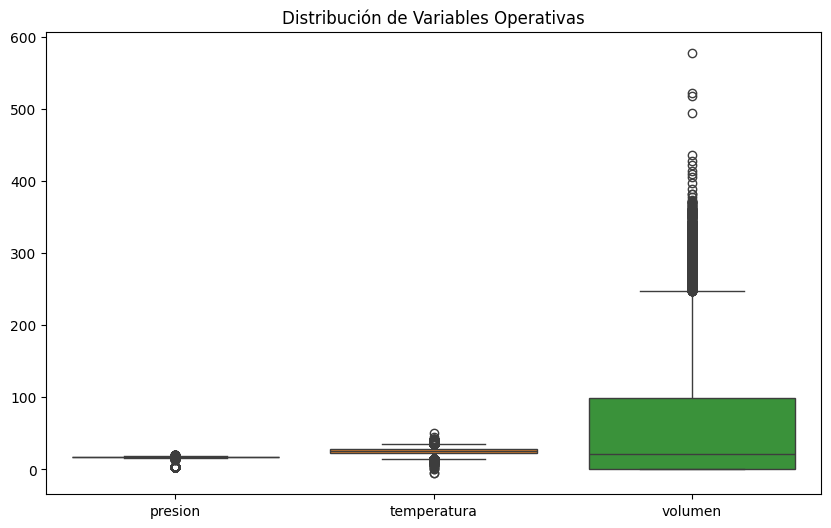

In [5]:
# Visualización de distribuciones
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['presion', 'temperatura', 'volumen']])
plt.title("Distribución de Variables Operativas")
plt.show()

***
5. Series de tiempo por cliente

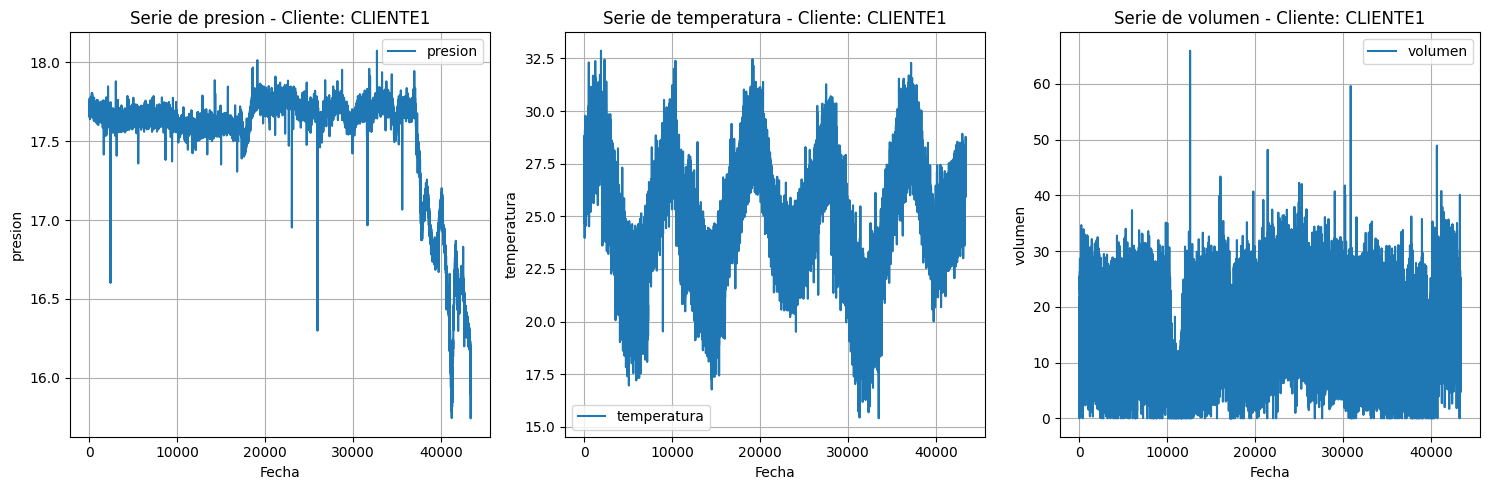

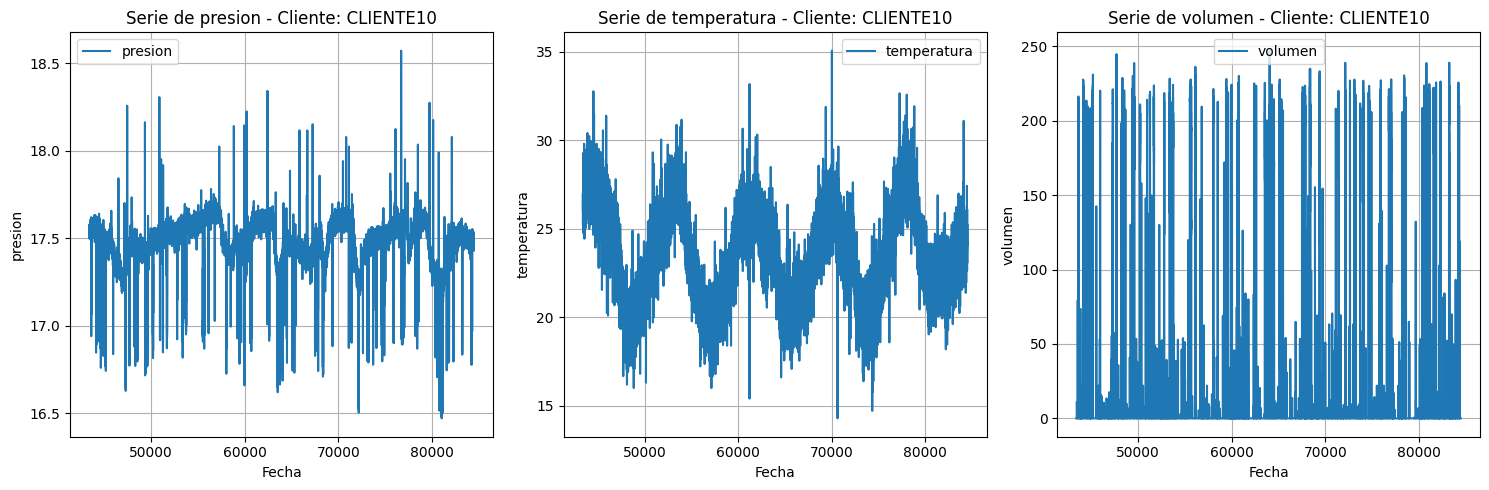

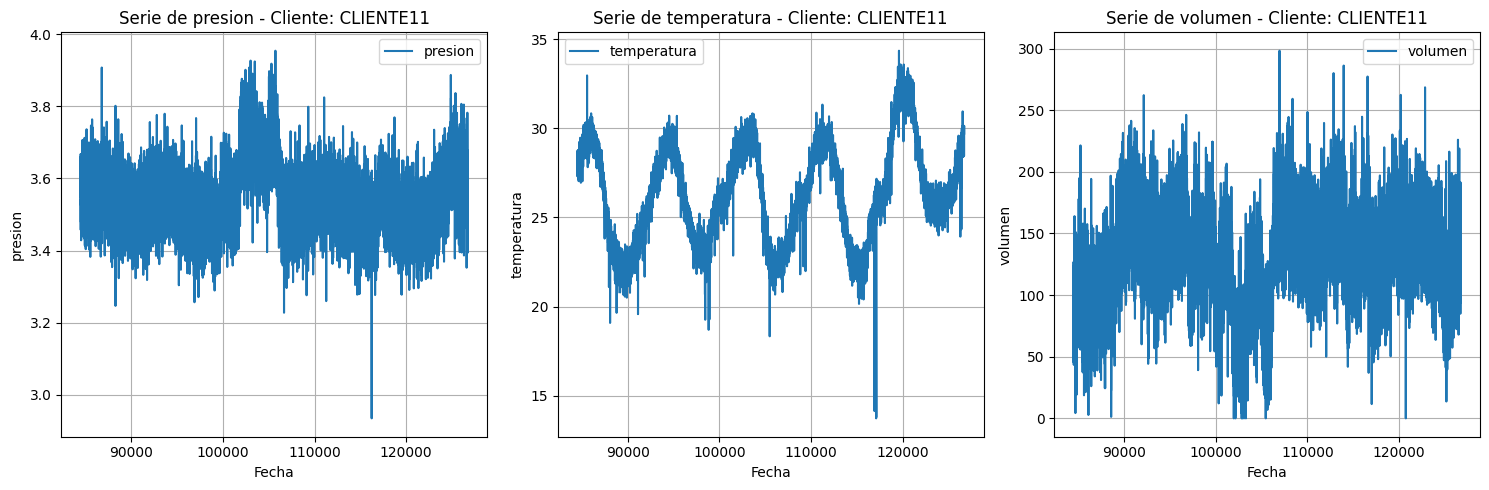

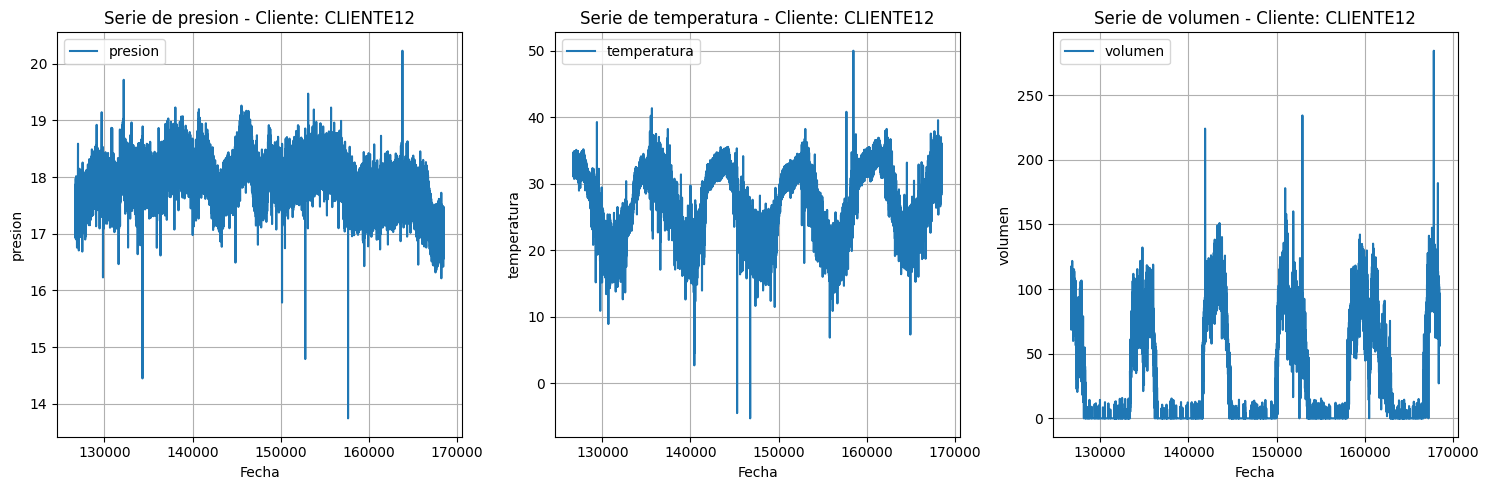

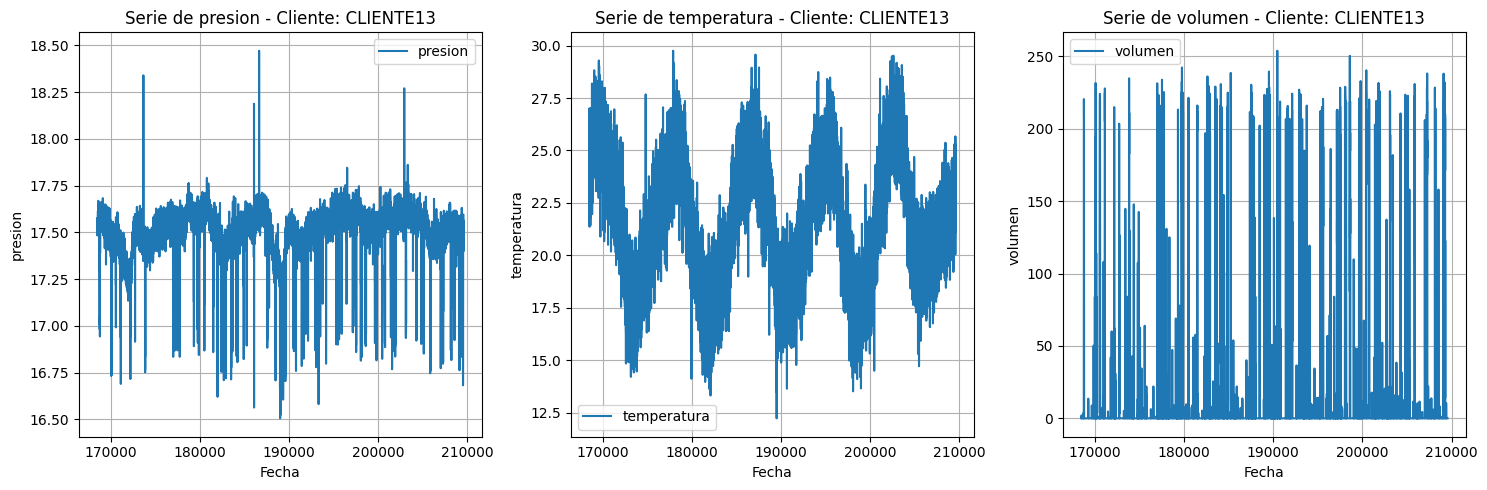

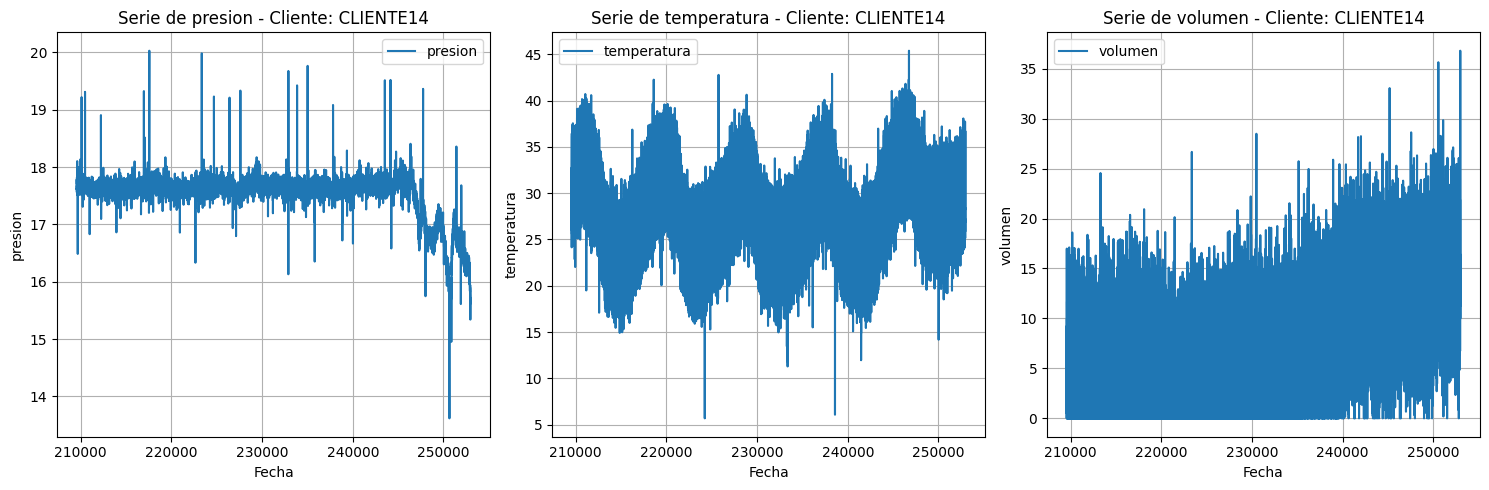

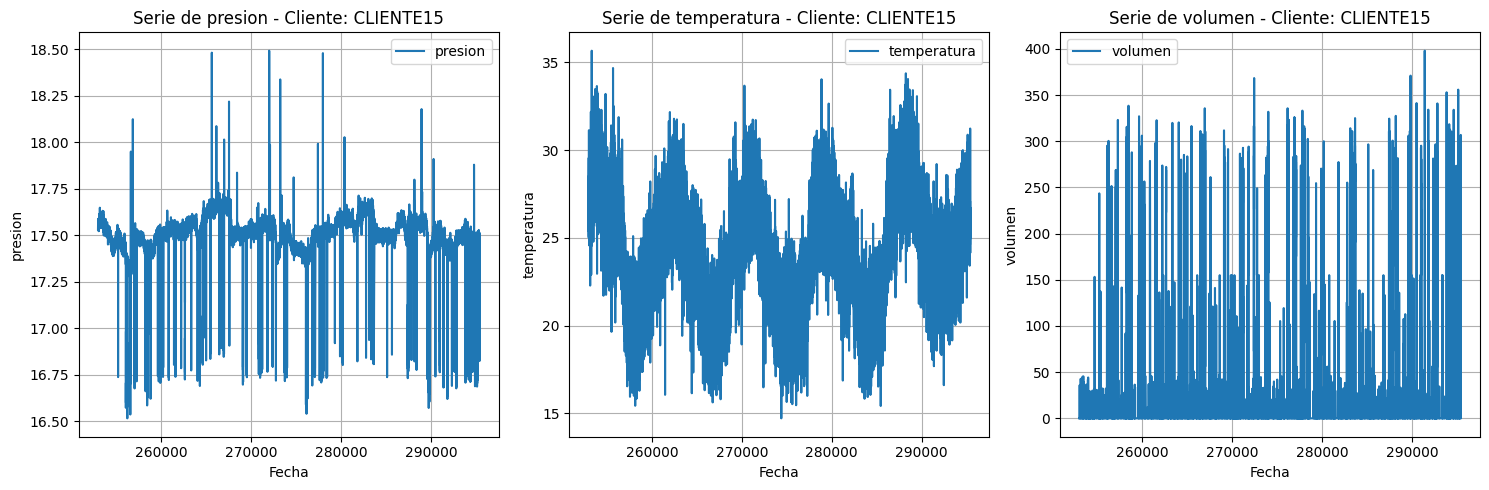

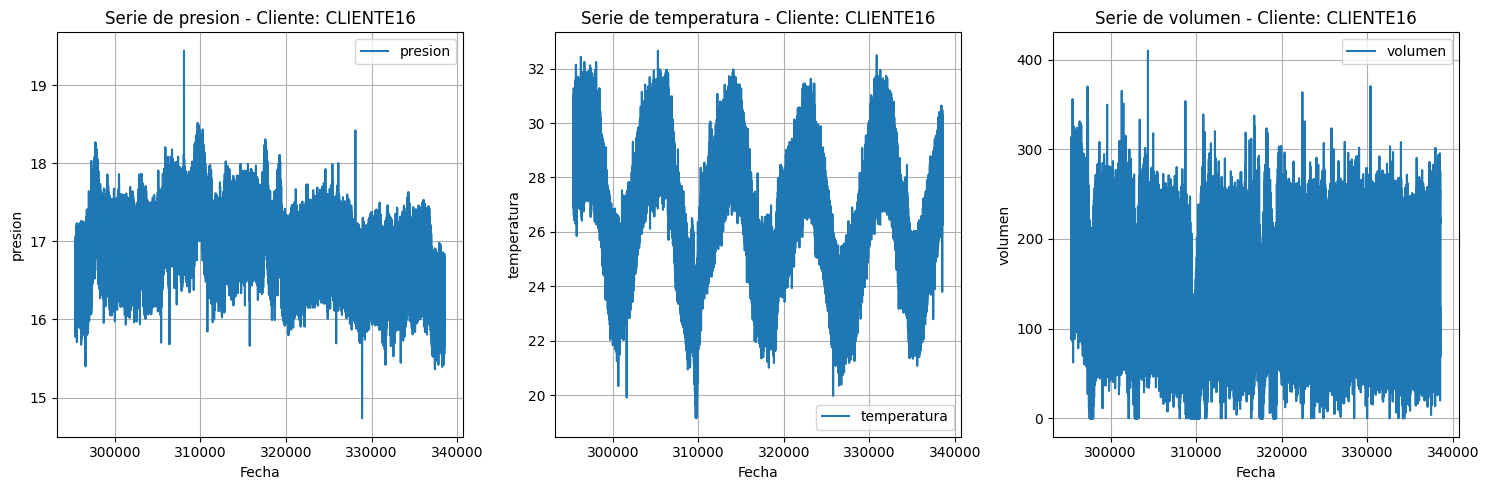

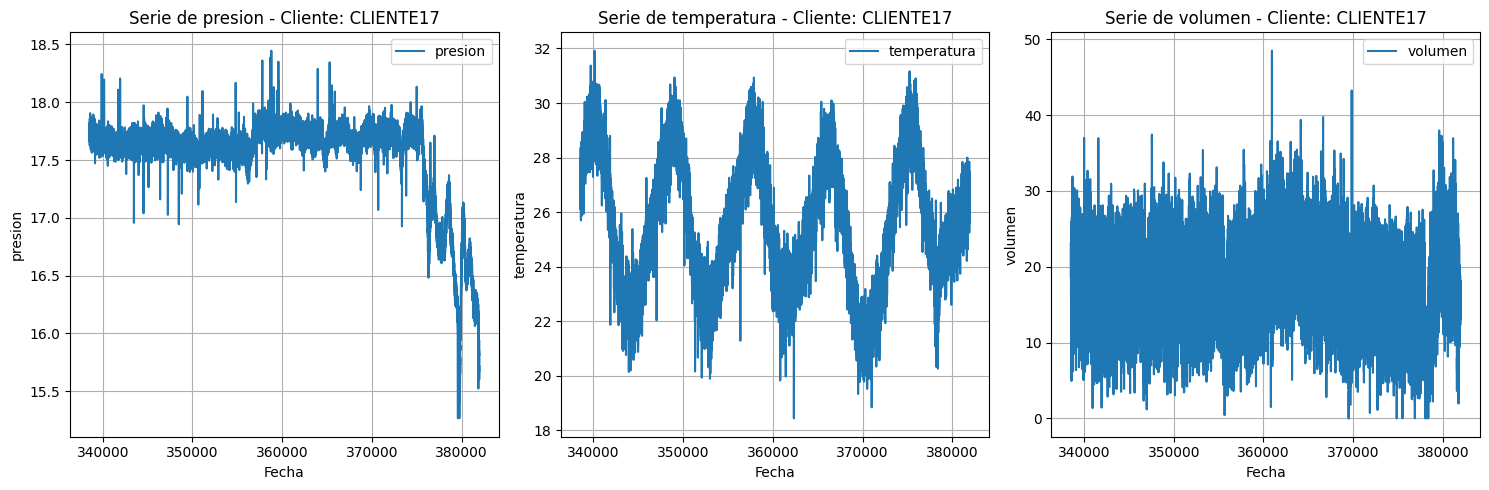

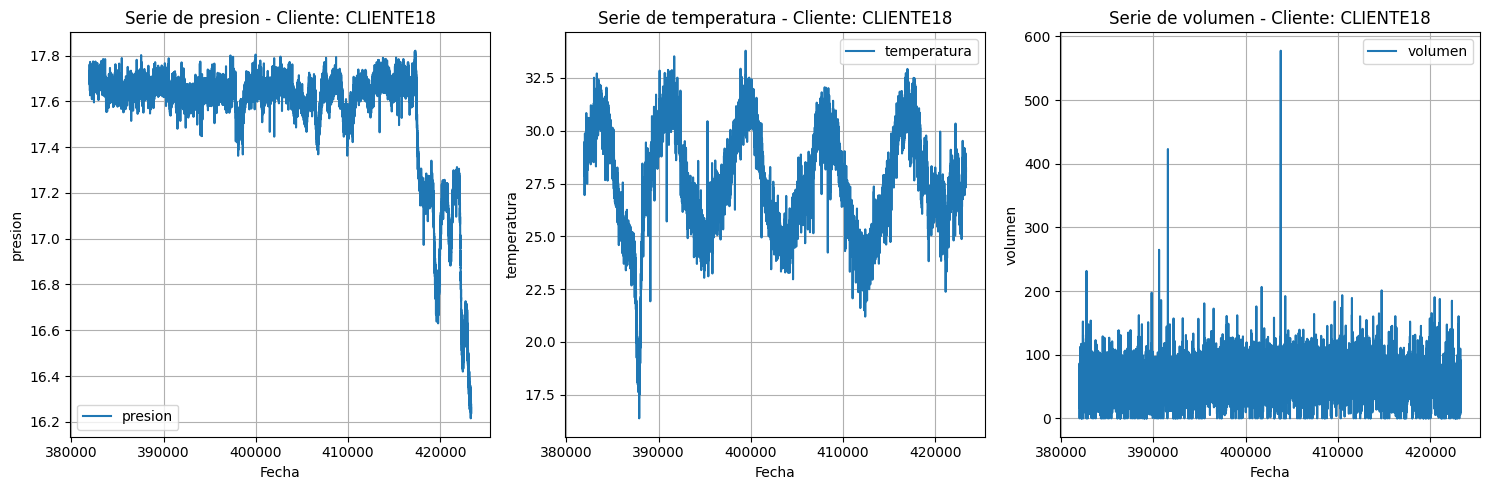

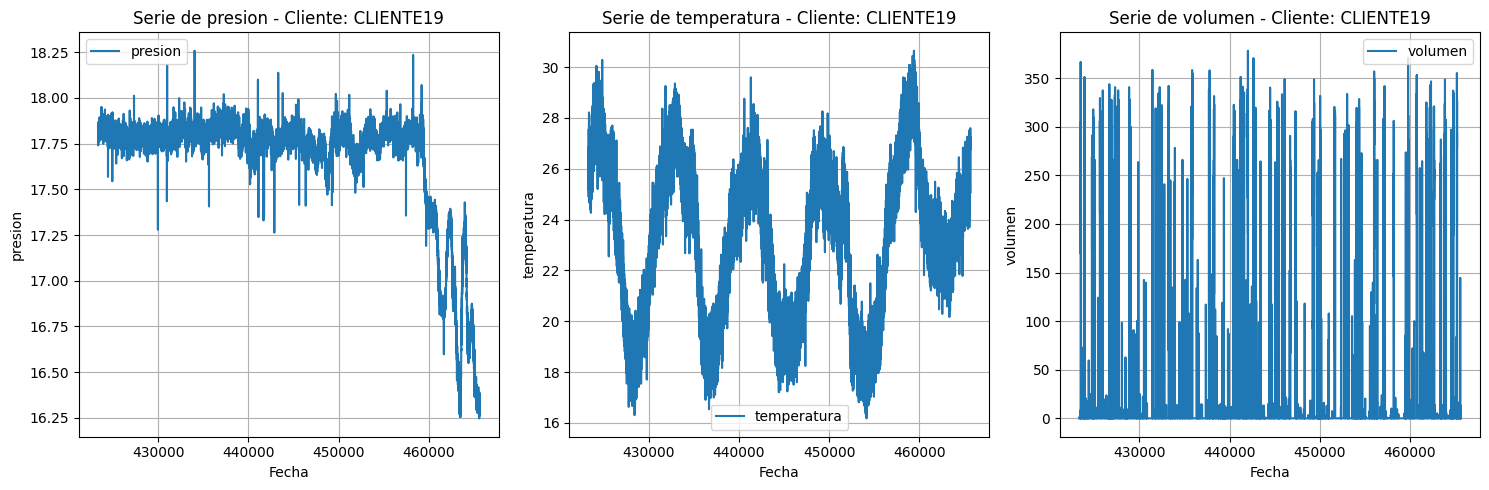

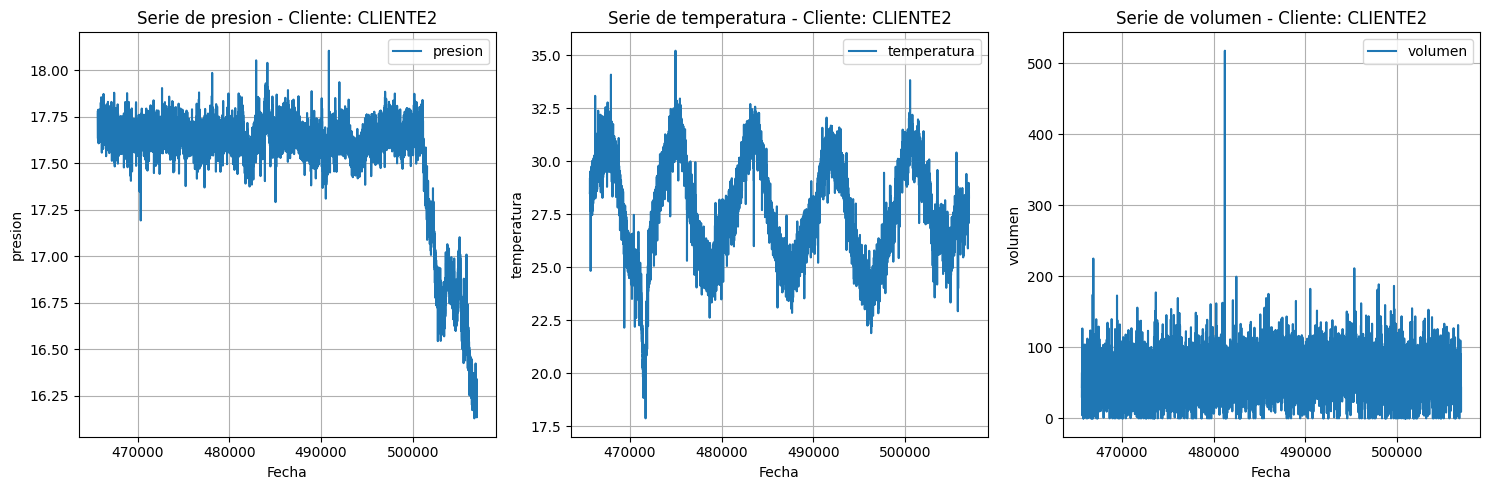

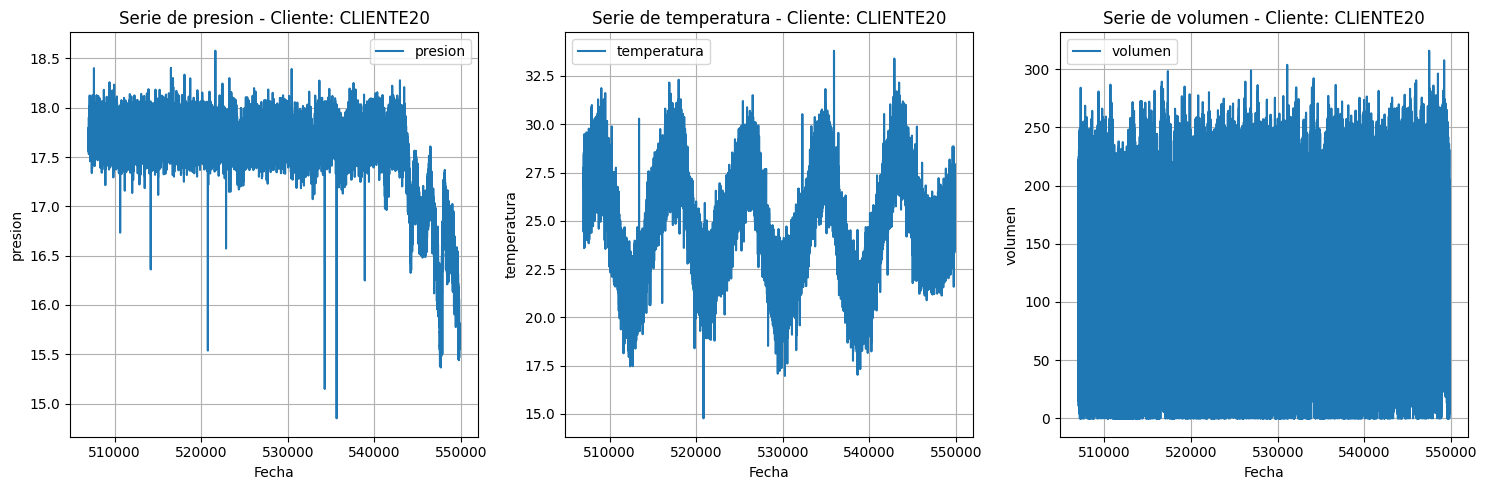

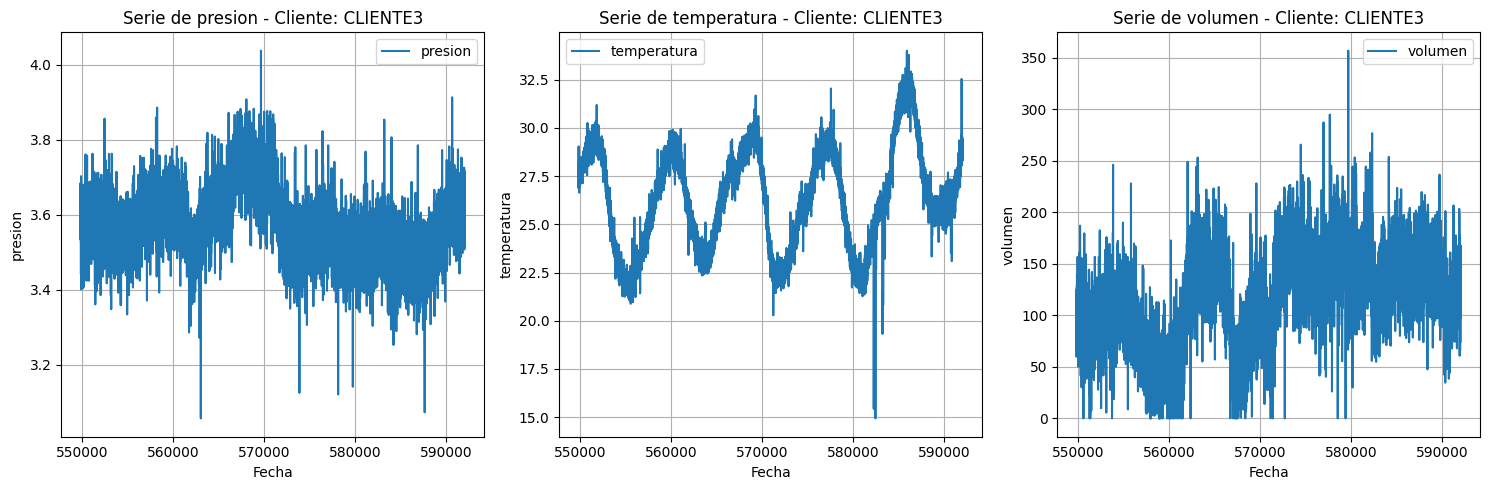

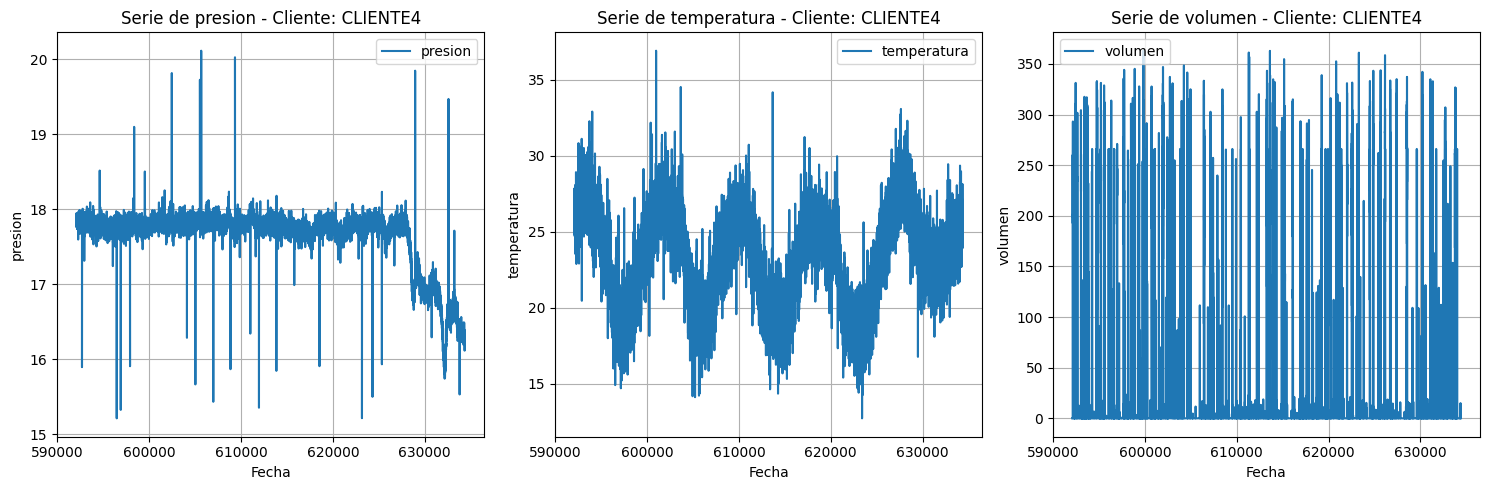

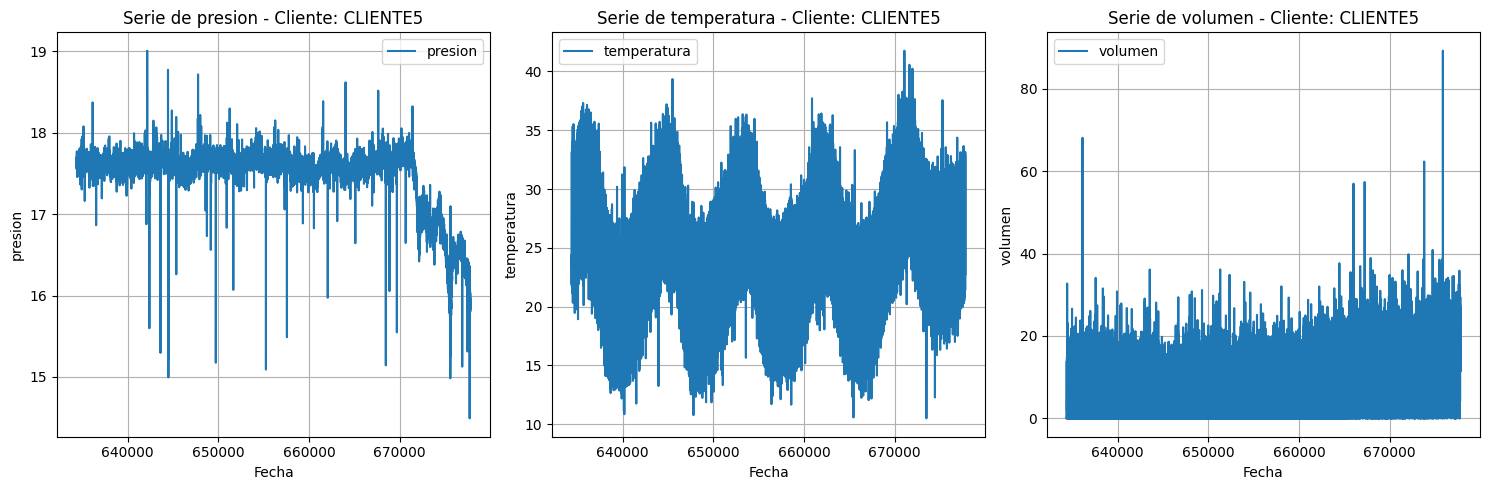

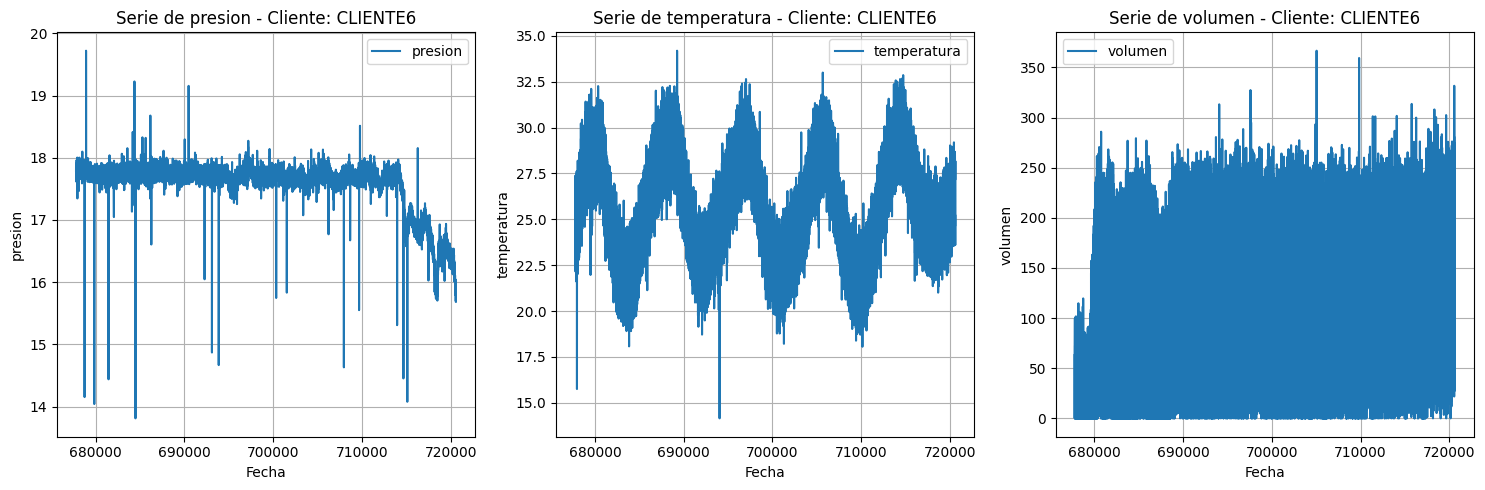

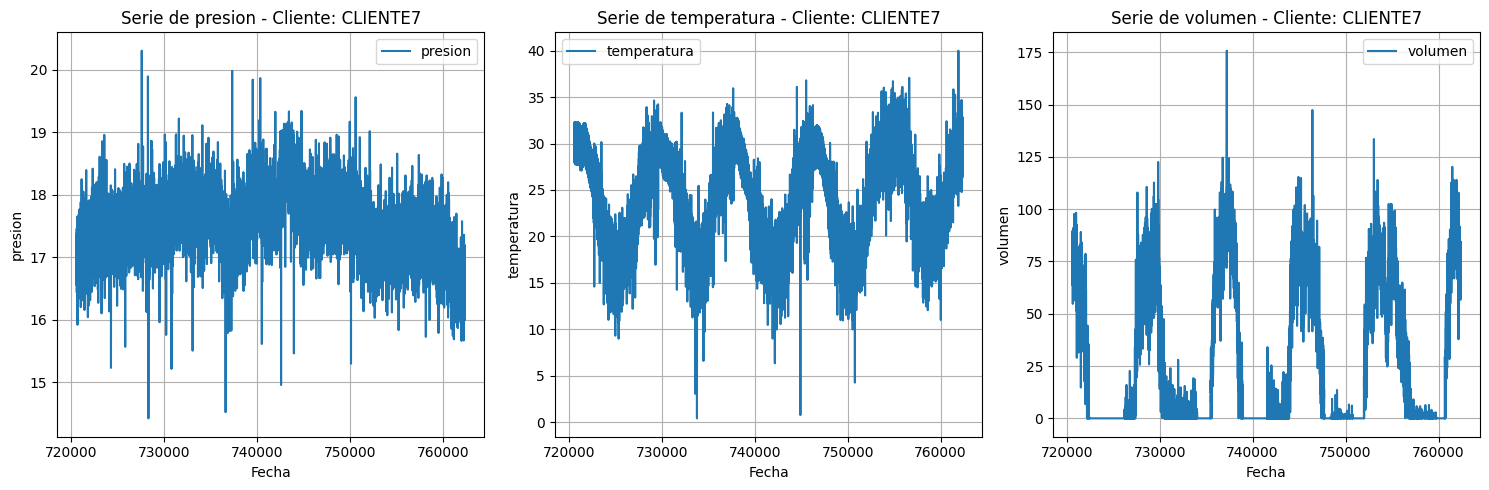

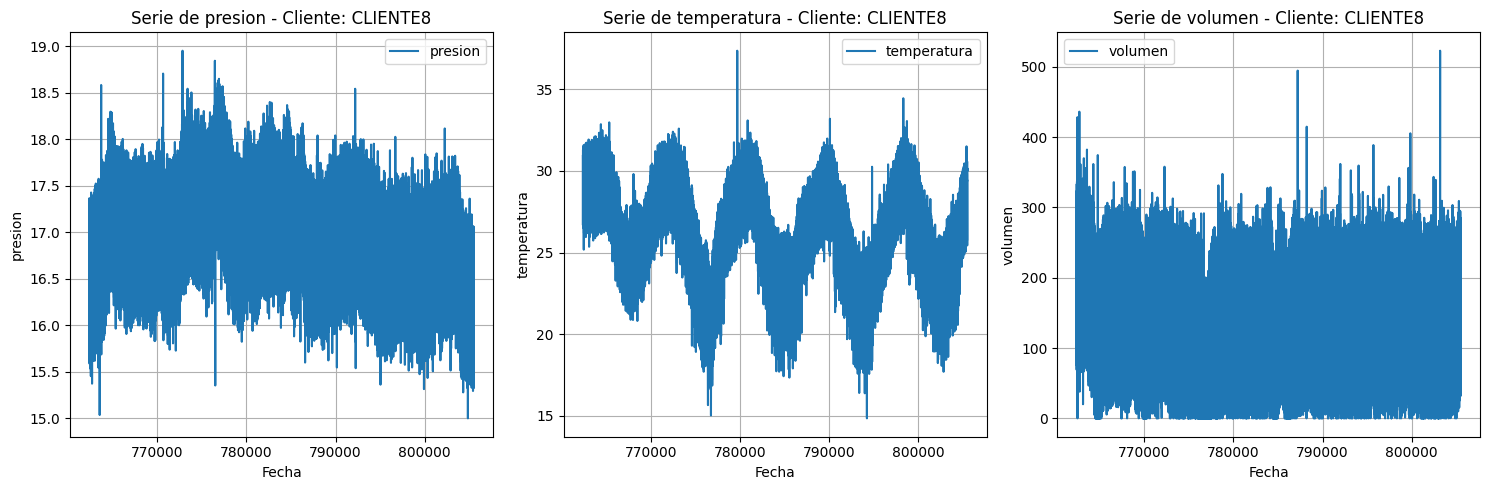

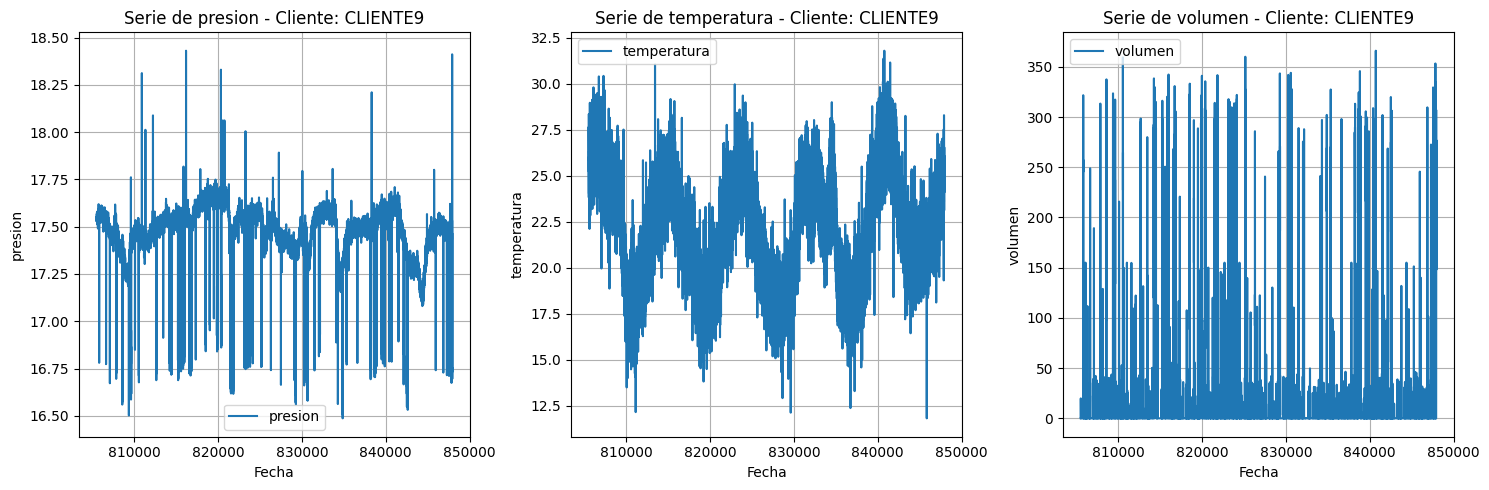

In [8]:
def graficar_series_por_cliente(df, variables=['presion', 'temperatura', 'volumen']):
    """
    Grafica las series de tiempo para cada cliente y las variables seleccionadas, calculando
    un estadístico (media, suma, etc.) por cliente.

    Args:
        df (DataFrame): DataFrame que contiene las columnas 'timestamp', 'cliente_id' y las variables a graficar.
        variables (list): Lista de nombres de las variables a graficar.
    """
    clientes_unicos = df['cliente_id'].unique()

    for cliente in clientes_unicos:
        df_cliente = df[df['cliente_id'] == cliente].copy()

        # Configurar subgráficos
        n_variables = len(variables)
        fig, axes = plt.subplots(1, n_variables, figsize=(15, 5), sharex=True)

        # Iterar sobre las variables y los ejes
        for i, var in enumerate(variables):
            ax = axes[i]
            ax.plot(df_cliente.index, df_cliente[var], label=f'{var}')
            ax.set_title(f"Serie de {var} - Cliente: {cliente}")
            ax.set_xlabel("Fecha")
            ax.set_ylabel(var)
            ax.grid()
            ax.legend()

        # Ajustar el espacio entre gráficos
        plt.tight_layout()
        plt.show()

# Ejemplo de uso
graficar_series_por_cliente(df)  # Cambia a 'suma' para sumar valores


***
6. Correlación entre variables

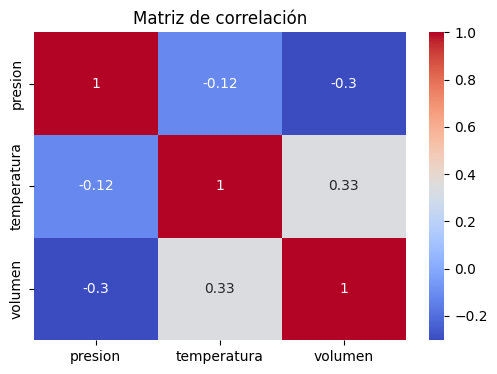

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['presion', 'temperatura', 'volumen']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


***
7. Distribuciones de variables

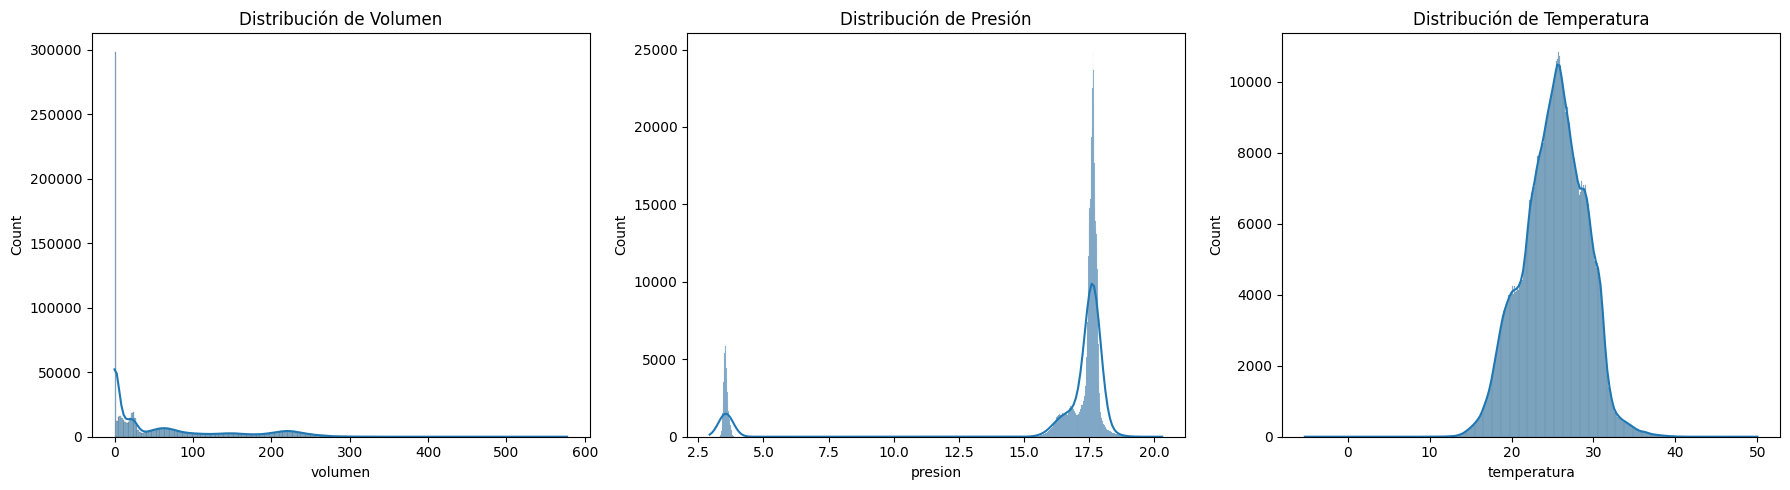

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['volumen'], kde=True, ax=axs[0])
axs[0].set_title("Distribución de Volumen")

sns.histplot(df['presion'], kde=True, ax=axs[1])
axs[1].set_title("Distribución de Presión")

sns.histplot(df['temperatura'], kde=True, ax=axs[2])
axs[2].set_title("Distribución de Temperatura")

plt.tight_layout()
plt.show()


***
8. Estadísticas descriptivas por cliente

In [11]:
# Estadísticas descriptivas por cliente
print("\nEstadísticas descriptivas por cliente:")
print(df.groupby('cliente_id')[['presion', 'temperatura', 'volumen']].describe())


Estadísticas descriptivas por cliente:
            presion                                                        \
              count       mean       std        min        25%        50%   
cliente_id                                                                  
CLIENTE1    43412.0  17.535934  0.358310  15.742337  17.590781  17.651439   
CLIENTE10   41059.0  17.473694  0.134933  16.469864  17.421424  17.495303   
CLIENTE11   42247.0   3.545513  0.082752   2.934873   3.490495   3.535771   
CLIENTE12   41776.0  17.833667  0.418490  13.740922  17.538897  17.834866   
CLIENTE13   41059.0  17.492521  0.120068  16.505077  17.457089  17.511078   
CLIENTE14   43415.0  17.517128  0.369094  13.616877  17.568526  17.632941   
CLIENTE15   42428.0  17.495812  0.139307  16.514496  17.471277  17.515236   
CLIENTE16   43146.0  16.705064  0.492338  14.734521  16.347856  16.619535   
CLIENTE17   43412.0  17.533599  0.380016  15.265703  17.581482  17.653419   
CLIENTE18   41377.0  17.554589  0.25

***
9. Valores atípicos visuales por cliente (Boxplots)

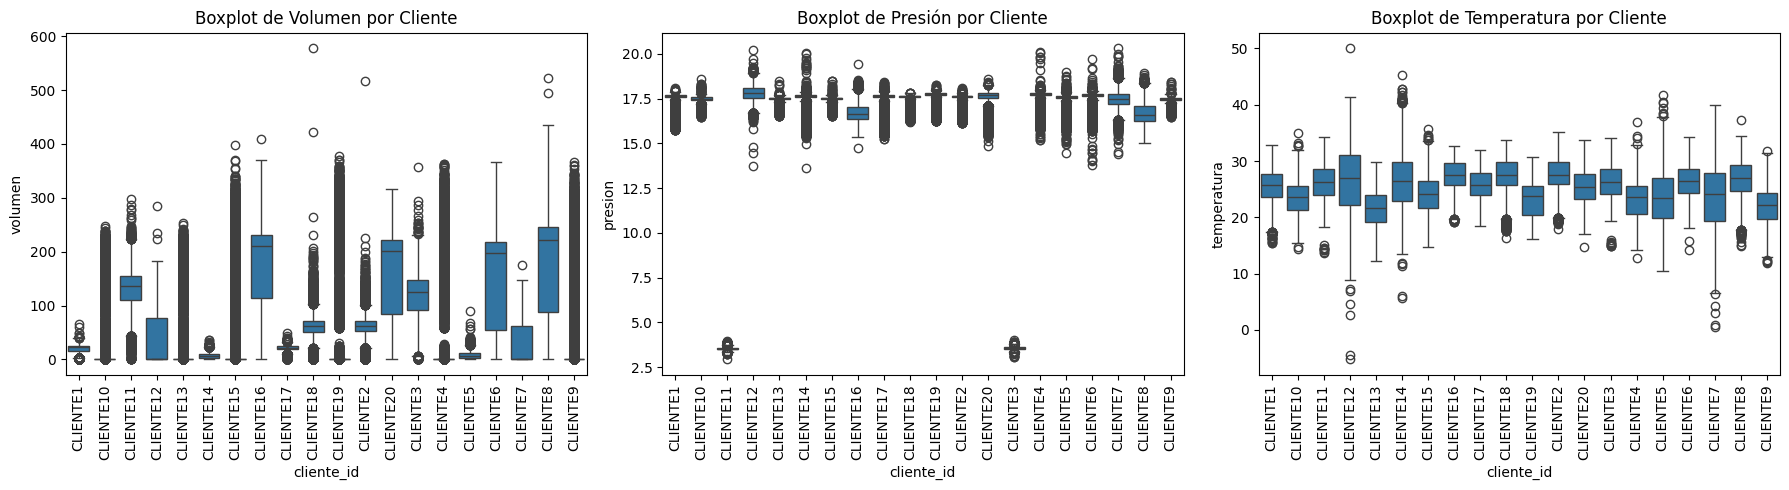

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x="cliente_id", y="volumen", ax=axs[0])
axs[0].set_title("Boxplot de Volumen por Cliente")
axs[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=df, x="cliente_id", y="presion", ax=axs[1])
axs[1].set_title("Boxplot de Presión por Cliente")
axs[1].tick_params(axis='x', rotation=90)

sns.boxplot(data=df, x="cliente_id", y="temperatura", ax=axs[2])
axs[2].set_title("Boxplot de Temperatura por Cliente")
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [13]:
def calcular_limites_y_contar_extremos(df, columnas):
    resultados = []

    for cliente in df['cliente_id'].unique():
        df_cliente = df[df['cliente_id'] == cliente].copy()
        resultado_cliente = {'cliente_id': cliente}

        for col in columnas:
            # Calcular límites
            Q1 = df_cliente[col].quantile(0.25)
            Q3 = df_cliente[col].quantile(0.75)
            IQR = Q3 - Q1
            min_val = Q1 - 1.5 * IQR
            max_val = Q3 + 1.5 * IQR

            # Marcar valores extremos
            extremos = ~df_cliente[col].between(min_val, max_val)
            conteo_extremos = extremos.sum()

            # Marcar valores extremos en el DataFrame principal
            df.loc[df['cliente_id'] == cliente, f'{col}_extremo_usuario'] = ~df_cliente[col].between(min_val, max_val)

            # Guardar resultados
            resultado_cliente[f'{col}_min'] = min_val
            resultado_cliente[f'{col}_max'] = max_val
            resultado_cliente[f'{col}_cont_extremos'] = conteo_extremos

        resultados.append(resultado_cliente)

    # Crear DataFrame con los resultados y ordenarlo
    resultados_df = pd.DataFrame(resultados)

    return resultados_df

# Aplicar la función
resultado_df = calcular_limites_y_contar_extremos(df, ['presion', 'temperatura', 'volumen'])

# Mostrar el DataFrame resultante
print("\nResultados de límites y conteo de valores extremos:")
print(resultado_df)



Resultados de límites y conteo de valores extremos:
   cliente_id  presion_min  presion_max  presion_cont_extremos  \
0    CLIENTE1    17.410291    17.891597                   5972   
1   CLIENTE10    17.206814    17.779107                   1615   
2   CLIENTE11     3.345695     3.731828                   1581   
3   CLIENTE12    16.688004    18.957052                    296   
4   CLIENTE13    17.296905    17.724061                   2509   
5   CLIENTE14    17.394357    17.858807                   6581   
6   CLIENTE15    17.332696    17.702244                   1952   
7   CLIENTE16    15.333989    18.037634                    279   
8   CLIENTE17    17.373058    17.928855                   6154   
9   CLIENTE18    17.463302    17.802891                   6179   
10  CLIENTE19    17.580510    17.962375                   6363   
11   CLIENTE2    17.441720    17.815029                   6027   
12  CLIENTE20    17.113844    18.244090                   4913   
13   CLIENTE3     3.353

***
10. Distribucion especifica de cada cliente

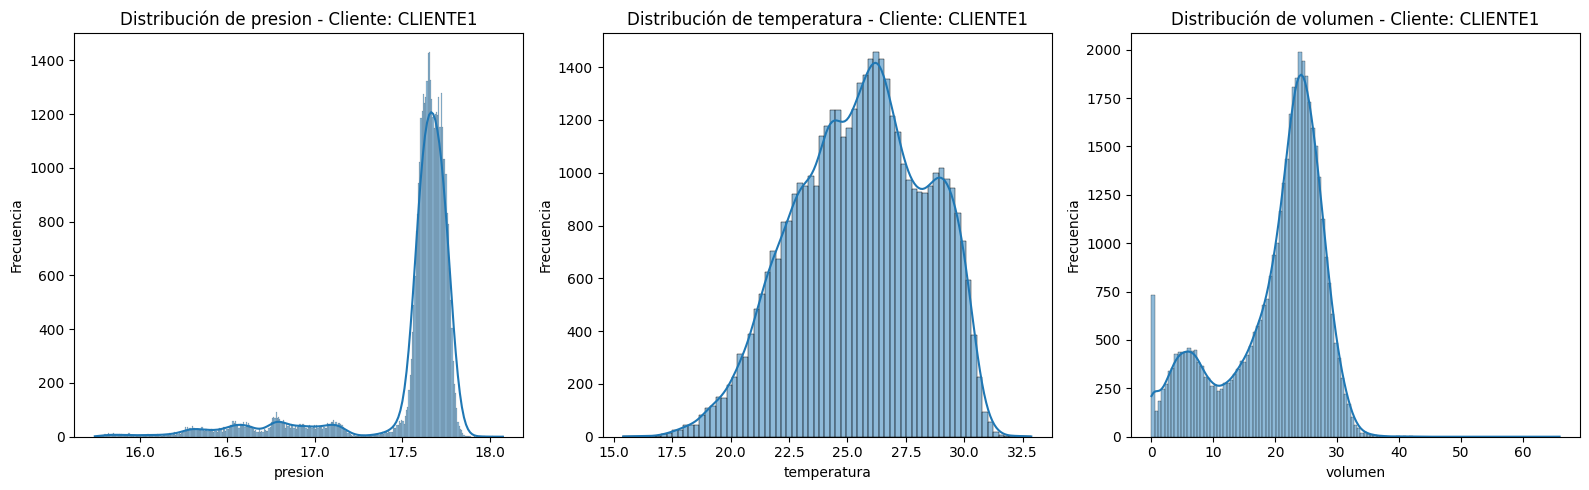

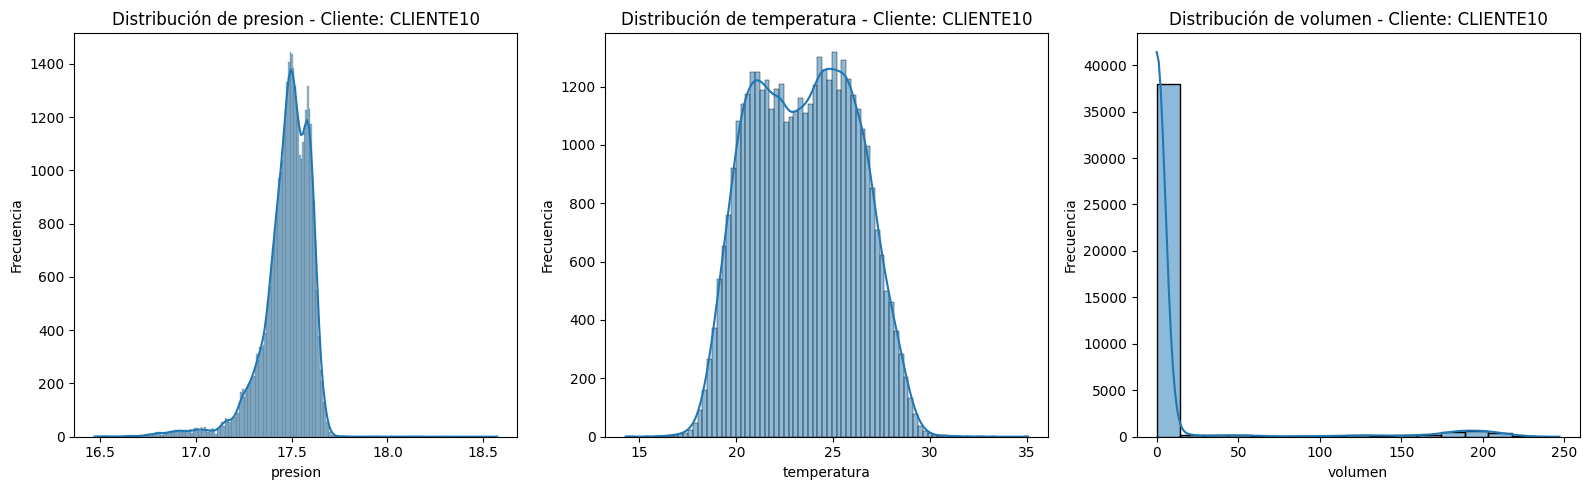

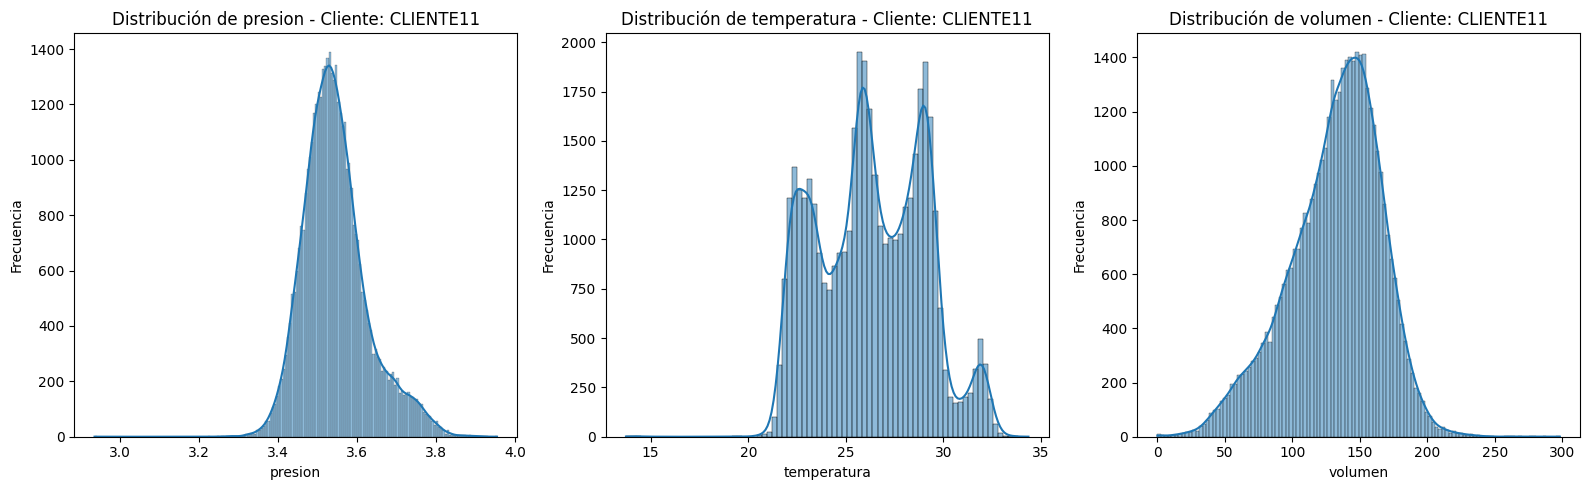

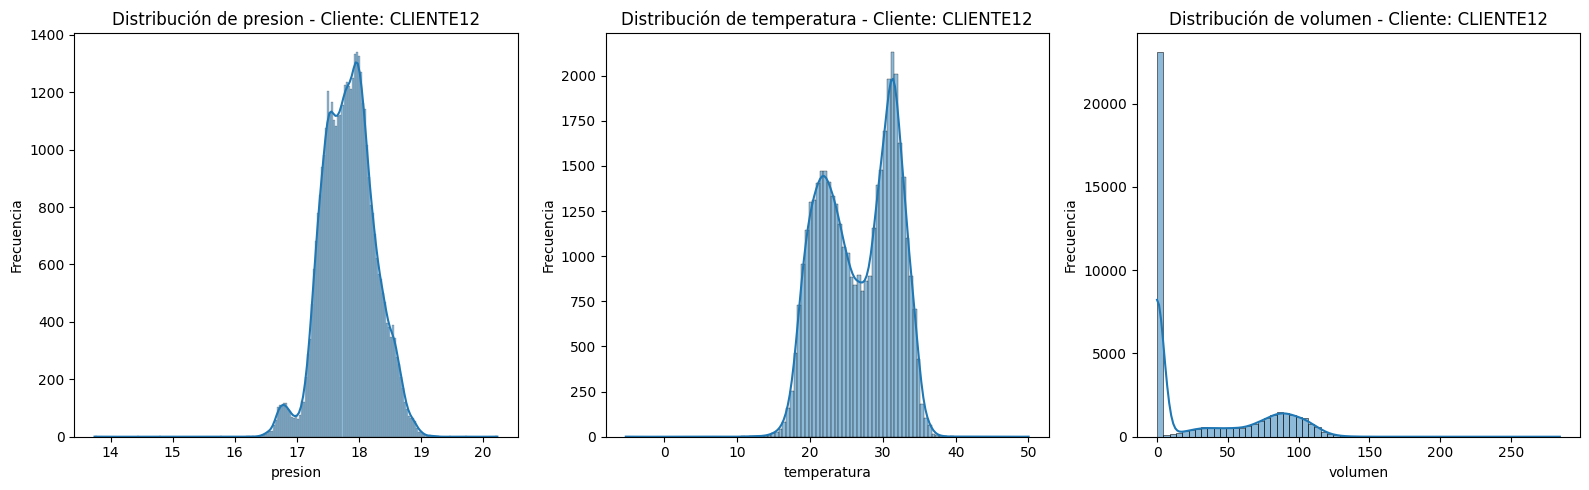

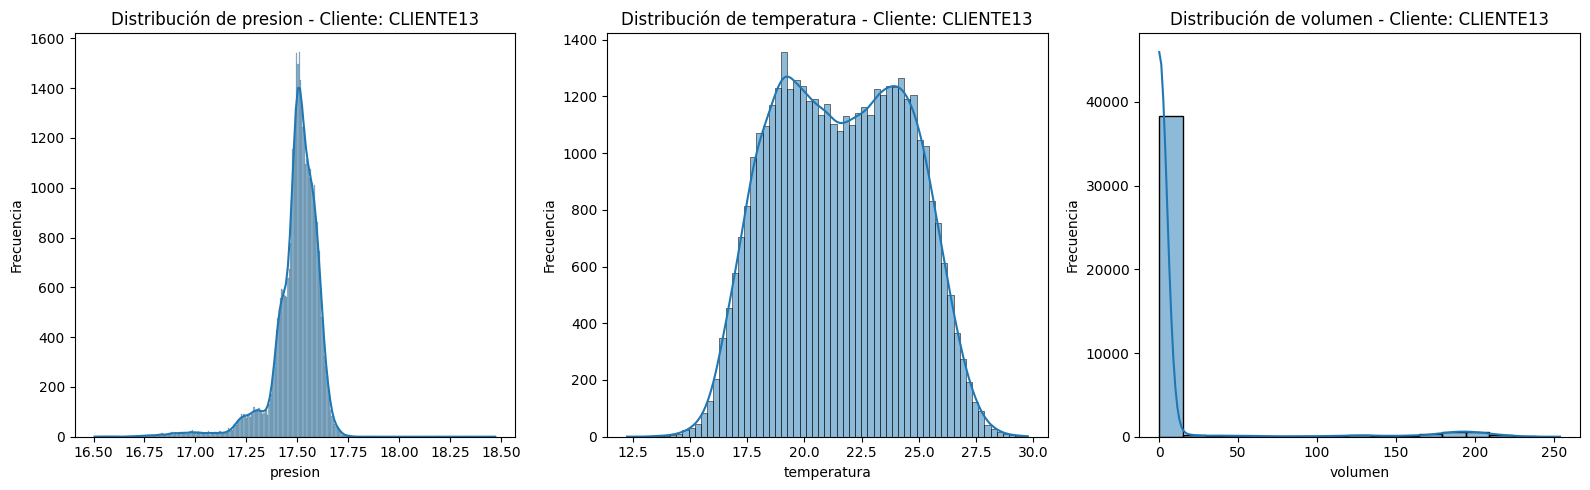

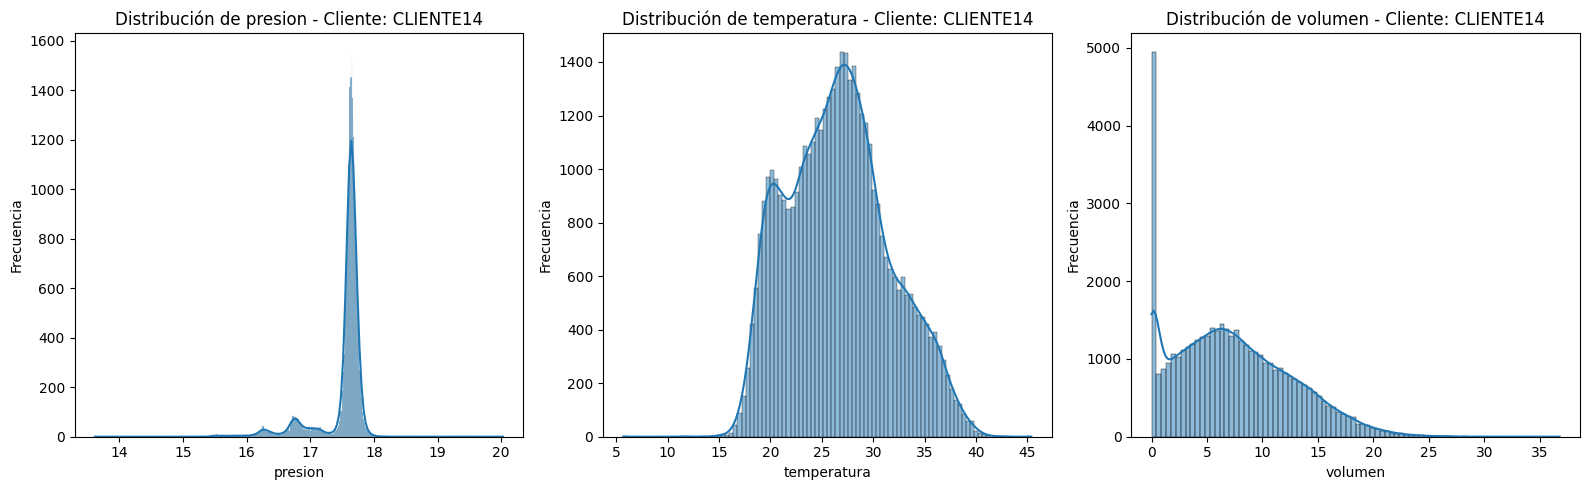

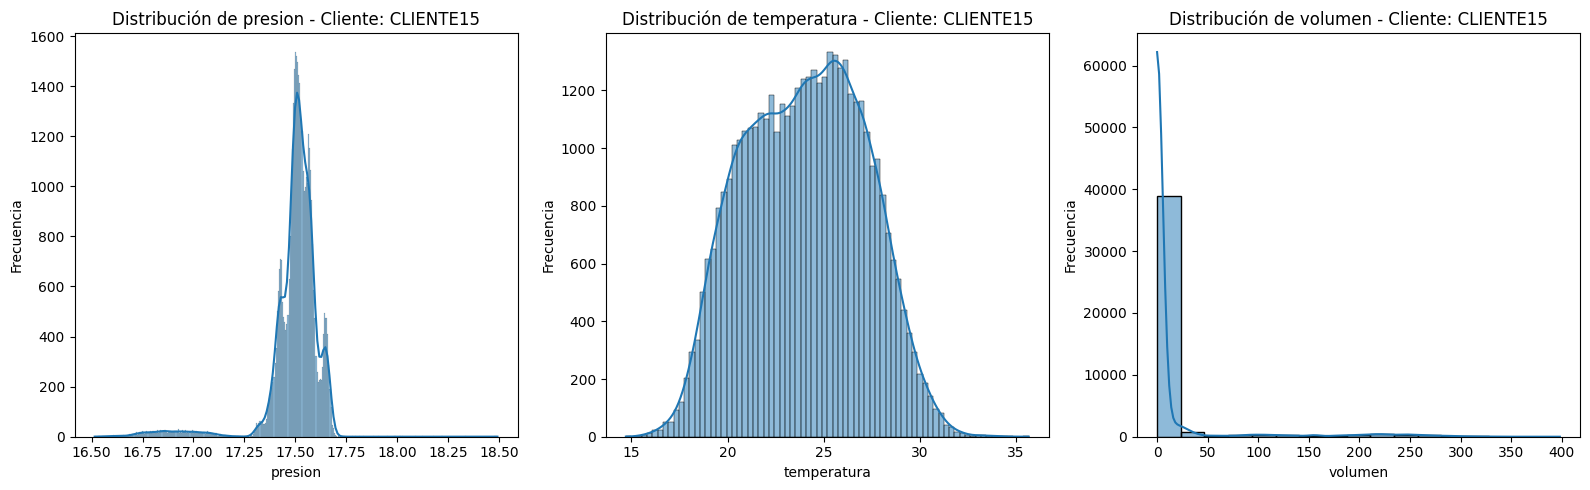

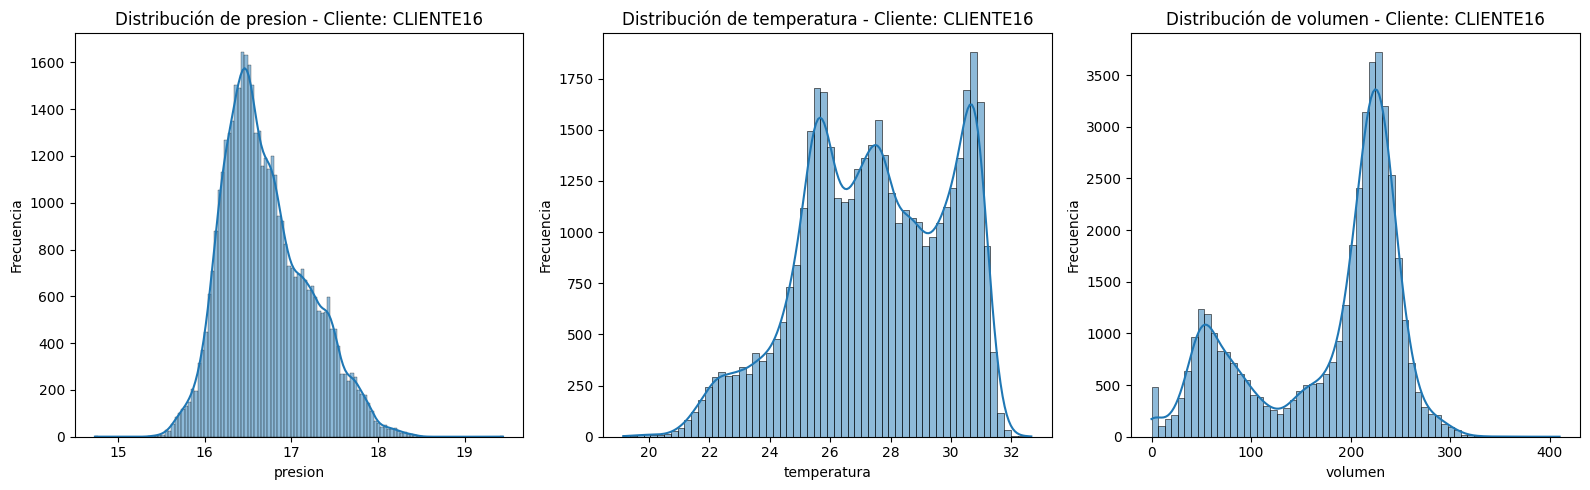

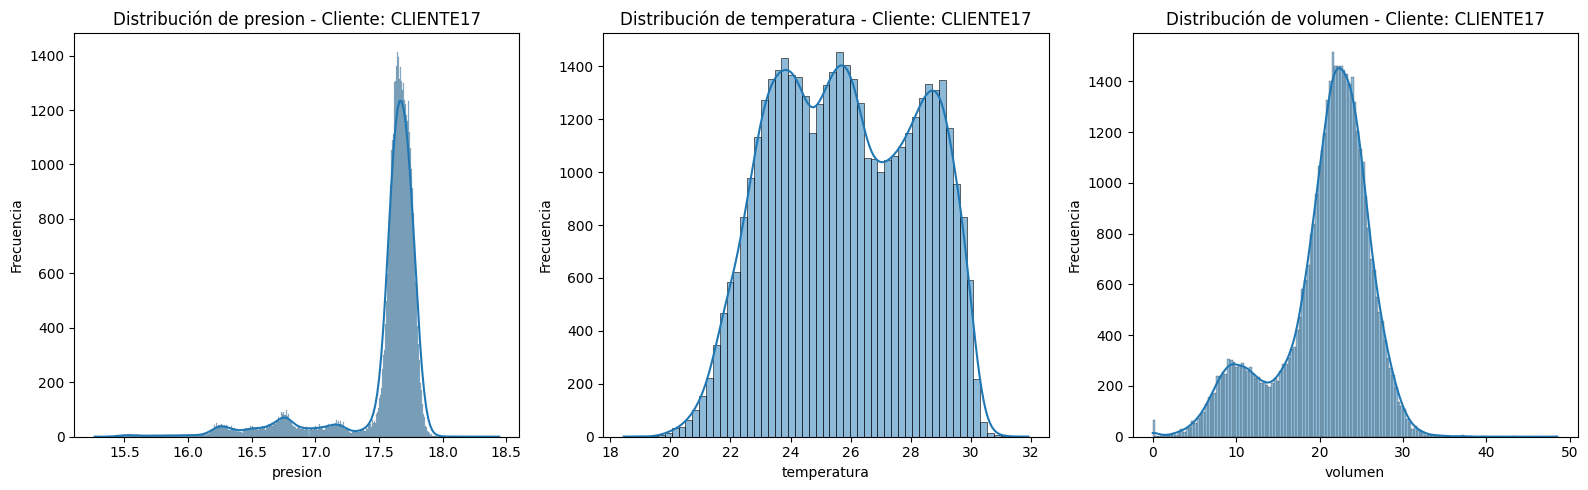

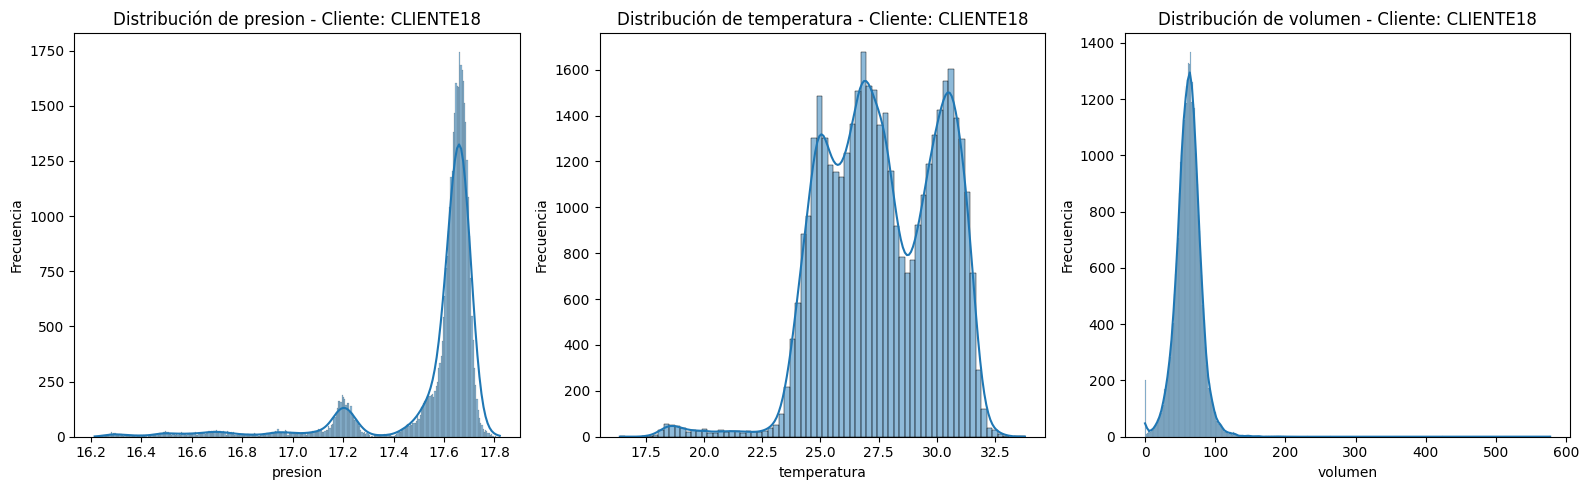

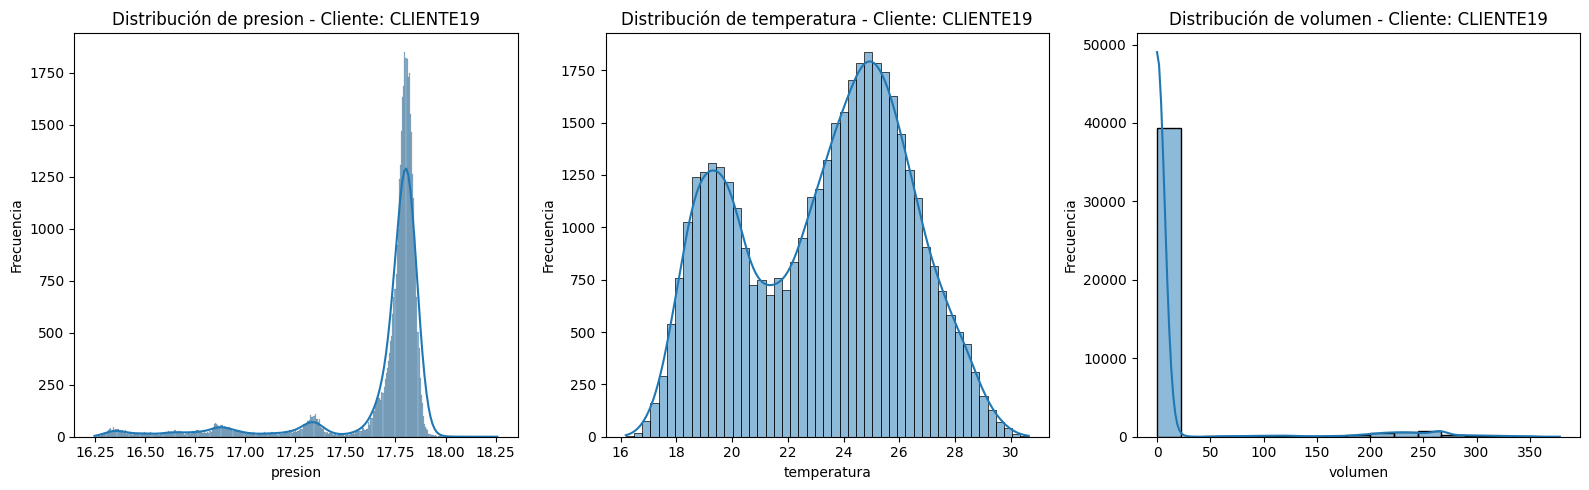

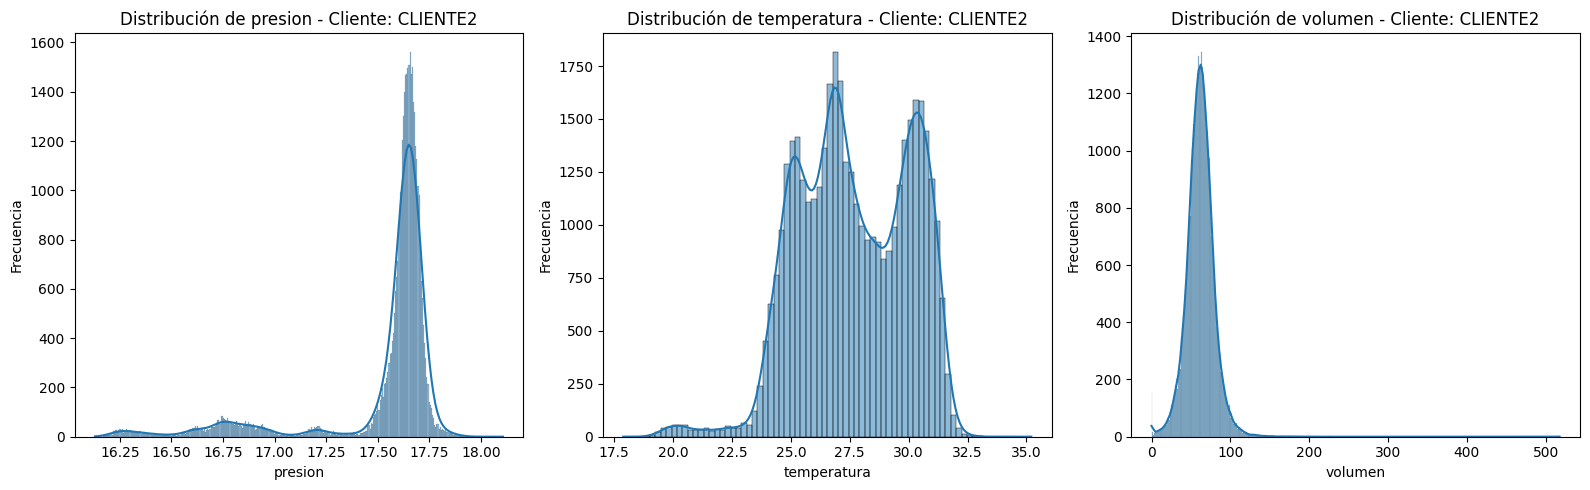

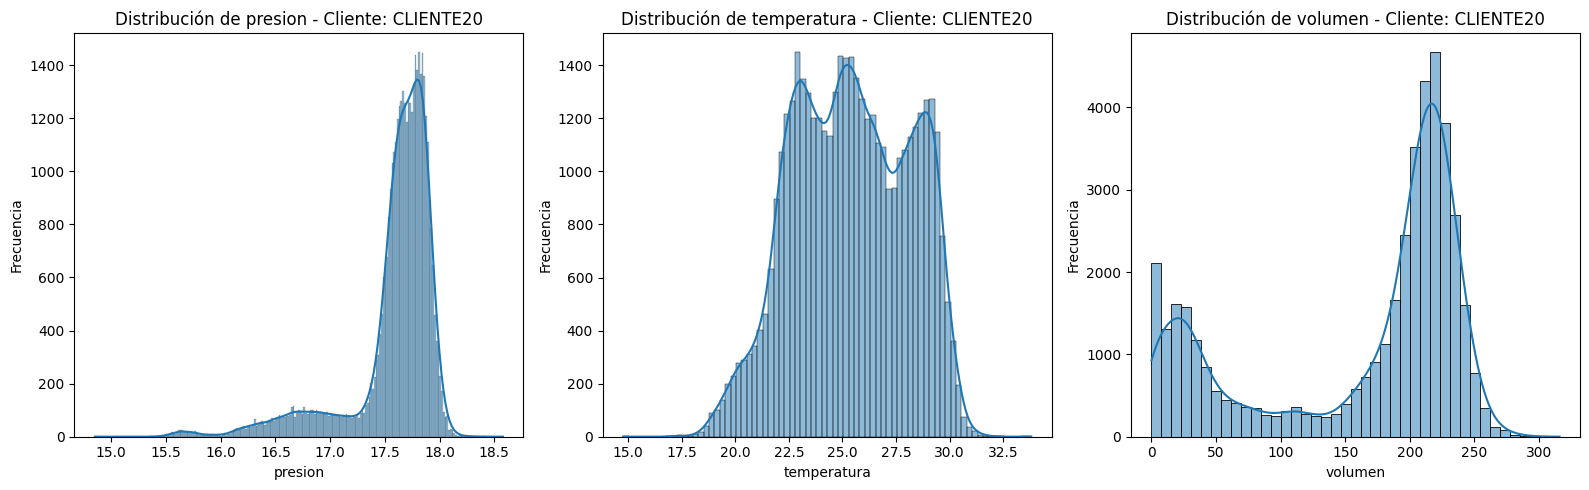

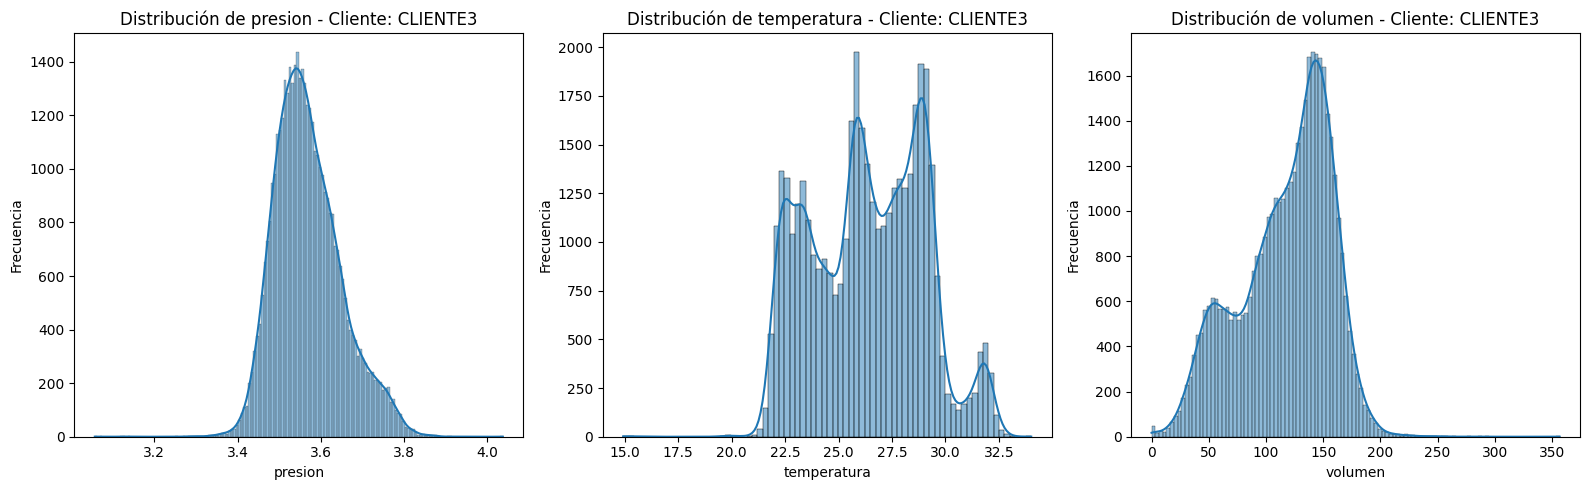

KeyboardInterrupt: 

In [ ]:
# Definir la función para graficar distribuciones de un cliente
def graficar_distribuciones_por_cliente(data, cliente, variables=['presion', 'temperatura', 'volumen']):
    """
    Grafica las distribuciones de las variables operativas para un cliente específico.

    Args:
        data (DataFrame): El DataFrame con los datos consolidados.
        cliente (str): El identificador del cliente.
        variables (list): Lista de nombres de las variables a graficar.
    """
    cliente_data = data[data['cliente_id'] == cliente]
    plt.figure(figsize=(16, 5))

    for i, var in enumerate(variables, 1):
        plt.subplot(1, len(variables), i)
        sns.histplot(cliente_data[var], kde=True)
        plt.title(f"Distribución de {var} - Cliente: {cliente}")
        plt.xlabel(var)
        plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()


# Aplicar la función a cada cliente
clientes_unicos = df['cliente_id'].unique()
for cliente in clientes_unicos:
    graficar_distribuciones_por_cliente(df, cliente)